In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

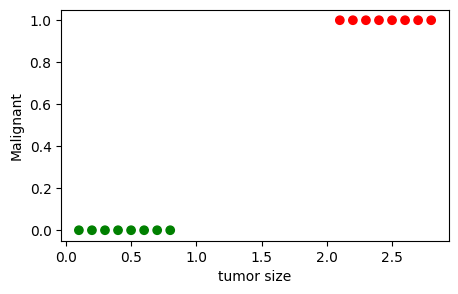

In [2]:
# synthetic data

# X data containng features bias term and size of tumour.
X = np.array([
  [1, 0.1],
  [1, 0.2],
  [1, 0.3],
  [1, 0.4],
  [1, 0.5],
  [1, 0.6],
  [1, 0.7],
  [1, 0.8],
  [1, 2.1],
  [1, 2.2],
  [1, 2.3],
  [1, 2.4],
  [1, 2.5],
  [1, 2.6],
  [1, 2.7],
  [1, 2.8],
])
Y = np.array([
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
])

# plot data
colors =['green']*8
for i in range(8):
    colors.append('red')

plt.figure(figsize = (5,3))
plt.scatter(X[:,1],Y, color = colors)
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.show()

In [3]:
## Useful functions
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

def mse_loss(y_pred, y_true):
  return np.mean((y_pred-y_true)**2)

#####################################################################
#### Developing Neural Network from scratch using MSE as loss #######
#####################################################################

## 1. Develop Neurons

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    #self.inputs = self.inputs
    z = np.dot(self.weights, inputs) + self.bias
    activation = sigmoid(z)
    return activation

## 2. Stack Neurons to create simple fully-connected 2 layer NN with 2 neuron in input layer and 1 in output layer.

class ThreeNeuronsNN:

  def __init__(self, weights1, bias1, weights2, bias2, weights3, bias3, print_loss=True):
    self.print_loss = print_loss
    self.weights1 = weights1
    self.weights2 = weights2
    self.weights3 = weights3
    self.bias1 = bias1
    self.bias2 = bias2
    self.bias3 = bias3
    self.n1 = Neuron(self.weights1, self.bias1)
    self.n2 = Neuron(self.weights2, self.bias2)
    self.n3 = Neuron(self.weights3, self.bias3)


  def ForwardAndBackward(self, X,Y, epochs=10, lr=0.001):
    for epoch in range(epochs):
      loss=0
      for x,y in zip(X,Y):

      # Run feedforward part
        self.z1 = self.n1.feedforward(x)
        self.z2 = self.n2.feedforward(x)
        inp_o = np.array([self.z1,self.z2]) # input to output neuron
        self.z3 = self.n3.feedforward(inp_o)

      # after feedforward, we calculate loss
        loss += mse_loss(self.z3, y)


      # TO update parameters - we need gradients
      ## Let's calculate them now

        self.f_z1 = sigmoid(self.z1)
        self.f_z2 = sigmoid(self.z2)
        self.f_z3 = sigmoid(self.z3)

        self.del_Z1w1 =  self.f_z1 *(1-self.f_z1)*x[0]
        self.del_Z1w2 =  self.f_z1 *(1-self.f_z1)*x[1]
        self.del_Z1b1 =  self.f_z1 *(1-self.f_z1)


        self.del_Z2w3 =  self.f_z2 *(1-self.f_z2)*x[0]
        self.del_Z2w4 =  self.f_z2 *(1-self.f_z2)*x[1]
        self.del_Z2b2 =  self.f_z2 *(1-self.f_z2)

        self.del_Z3w5 =  self.f_z3 *(1-self.f_z3)*self.z1
        self.del_Z3w6 =  self.f_z3 *(1-self.f_z3)*self.z2
        self.del_Z3b3 =  self.f_z3 *(1-self.f_z3)

        self.del_Z3Z1 =  self.f_z3 *(1-self.f_z3)*self.weights3[0]
        self.del_Z3Z2 =  self.f_z3 *(1-self.f_z3)*self.weights3[1]

        self.del_LossZ3 = 2*(self.z3-y)

      # Now we add backpropagation part (Chain rule)

        del_L1w1 = self.del_LossZ3 * self.del_Z3Z1 * self.del_Z1w1
        del_L1w2 = self.del_LossZ3 * self.del_Z3Z1 * self.del_Z1w2
        del_L1b1 = self.del_LossZ3 * self.del_Z3Z1 * self.del_Z1b1

        del_L1w3 = self.del_LossZ3 * self.del_Z3Z2 * self.del_Z2w3
        del_L1w4 = self.del_LossZ3 * self.del_Z3Z2 * self.del_Z2w4
        del_L1b2 = self.del_LossZ3 * self.del_Z3Z2 * self.del_Z2b2

        del_L1w5 = self.del_LossZ3 * self.del_Z3w5
        del_L1w6 = self.del_LossZ3 * self.del_Z3w6
        del_L1b3 = self.del_LossZ3 * self.del_Z3b3


      # update parameters
        self.weights1[0] = self.weights1[0] - lr*(del_L1w1.item())
        self.weights1[1] = self.weights1[1] - lr*(del_L1w2.item())
        self.weights2[0] = self.weights2[0] - lr*(del_L1w3.item())
        self.weights2[1] = self.weights2[1] - lr*(del_L1w4.item())
        self.weights3[0] = self.weights3[0] - lr*(del_L1w5.item())
        self.weights3[1] = self.weights3[1] - lr*(del_L1w6.item())
        self.bias1[0] = self.bias1[0] - lr*(del_L1b1.item())
        self.bias2[0] = self.bias2[0] - lr*(del_L1b2.item())
        self.bias3[0] = self.bias3[0] - lr*(del_L1b3.item())

      # print loss after each epoch
      if self.print_loss:
        if epoch%10==0:
          print(f'Epoch: {epoch}: {x}, {y},  MSE train loss: {loss}')


  def predict(self,x):
    z1 = self.n1.feedforward(x)
    z2 = self.n2.feedforward(x)
    inp_o = np.array([z1,z2]) # input to output neuron
    z3 = self.n3.feedforward(inp_o)
    return z3



In [20]:
weights1 = np.random.randn(2)
weights2 = np.random.randn(2)
weights3 = np.random.randn(2)
bias1 = np.random.randn(1)
bias2 = np.random.randn(1)
bias3 = np.random.randn(1)

# Train our neural network!
model_mse = ThreeNeuronsNN(weights1, bias1, weights2, bias2, weights3, bias3)
model_mse.ForwardAndBackward(X,Y, lr=0.005, epochs=500)

# Let's check the performance on training set (Note: One should check it for both training and val/test)
print('\npredictions: ')
for x,y in zip(X,Y):
  pred = np.where(model_mse.predict(x)>=0.5, 1, 0)
  print(f'{x}  {y} ----> {model_mse.predict(x)} --->{pred}')

Epoch: 0: [1.  2.8], 1,  MSE train loss: 4.399059014579195
Epoch: 10: [1.  2.8], 1,  MSE train loss: 4.349465328725094
Epoch: 20: [1.  2.8], 1,  MSE train loss: 4.305874373156811
Epoch: 30: [1.  2.8], 1,  MSE train loss: 4.266349223222057
Epoch: 40: [1.  2.8], 1,  MSE train loss: 4.229359567940198
Epoch: 50: [1.  2.8], 1,  MSE train loss: 4.193704780048587
Epoch: 60: [1.  2.8], 1,  MSE train loss: 4.1584424583990485
Epoch: 70: [1.  2.8], 1,  MSE train loss: 4.122827586010959
Epoch: 80: [1.  2.8], 1,  MSE train loss: 4.086263481090986
Epoch: 90: [1.  2.8], 1,  MSE train loss: 4.048263774937881
Epoch: 100: [1.  2.8], 1,  MSE train loss: 4.008423887614303
Epoch: 110: [1.  2.8], 1,  MSE train loss: 3.9664003296671675
Epoch: 120: [1.  2.8], 1,  MSE train loss: 3.9218963001736653
Epoch: 130: [1.  2.8], 1,  MSE train loss: 3.874652292584994
Epoch: 140: [1.  2.8], 1,  MSE train loss: 3.8244406663793487
Epoch: 150: [1.  2.8], 1,  MSE train loss: 3.7710633524729635
Epoch: 160: [1.  2.8], 1,  MSE

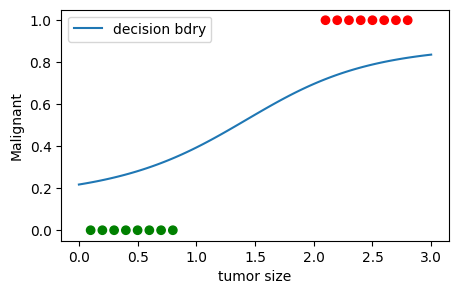

In [24]:
# plot Decision Boundary
xs = np.linspace(0,3, 100)
x0s = np.ones_like(xs)
Xs = np.stack([x0s, xs], axis=1)
ys = []
for x in Xs:
  pred = model_mse.predict(x)
  ys.append(pred)


colors =['green']*8
for i in range(8):
    colors.append('red')

plt.figure(figsize = (5,3))
plt.scatter(X[:,1],Y, color = colors)
plt.plot(Xs[:,1], ys, label='decision bdry')
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.legend()
plt.show()

In [10]:
# define a utility function
def trainandplot(network, X, Y, print_loss, colorss):
  weights1 = np.random.randn(2)
  weights2 = np.random.randn(2)
  weights3 = np.random.randn(2)
  bias1 = np.random.randn(1)
  bias2 = np.random.randn(1)
  bias3 = np.random.randn(1)

  # Train our neural network!
  model = network(weights1, bias1, weights2, bias2, weights3, bias3, print_loss)
  model.ForwardAndBackward(X,Y, lr=0.005, epochs=500)

  # Let's check the performance on training set (Note: One should check it for both training and val/test)
  print('\npredictions: ')
  for x,y in zip(X,Y):
    pred = np.where(model.predict(x)>=0.5, 1, 0)
    print(f'{x}  {y} ----> {model.predict(x)} --->{pred}')

  # plot Decision Boundary
  xs = np.linspace(0,3, 100)
  x0s = np.ones_like(xs)
  Xs = np.stack([x0s, xs], axis=1)
  ys = []
  for x in Xs:
    pred = model.predict(x)
    ys.append(pred)

  plt.figure(figsize = (5,3))
  plt.scatter(X[:,1],Y, color = colorss)
  plt.plot(Xs[:,1], ys, label='decision bdry')
  plt.xlabel('tumor size')
  plt.ylabel('Malignant')
  plt.legend()
  plt.show()

  return model

MSE loss is not a good loss for Classification. Because it leads to Gradient Saturation.
> The gradient of the loss with respect to the model's parameters can become very small when the prediction is close to 0 or 1, leading to slow convergence or even convergence to suboptimal solutions.

Let's demonstrate this with performing 10 trials and we should observe poor fit (due to gradient saturation) and large variability (because it depends on initialization)


predictions: 
[1.  0.1]  0 ----> [0.22535119] --->[0]
[1.  0.2]  0 ----> [0.24931517] --->[0]
[1.  0.3]  0 ----> [0.27617245] --->[0]
[1.  0.4]  0 ----> [0.30596693] --->[0]
[1.  0.5]  0 ----> [0.33853929] --->[0]
[1.  0.6]  0 ----> [0.37346811] --->[0]
[1.  0.7]  0 ----> [0.4100499] --->[0]
[1.  0.8]  0 ----> [0.44734021] --->[0]
[1.  2.1]  1 ----> [0.72000566] --->[1]
[1.  2.2]  1 ----> [0.72536053] --->[1]
[1.  2.3]  1 ----> [0.72973715] --->[1]
[1.  2.4]  1 ----> [0.73331134] --->[1]
[1.  2.5]  1 ----> [0.73622908] --->[1]
[1.  2.6]  1 ----> [0.73861074] --->[1]
[1.  2.7]  1 ----> [0.74055514] --->[1]
[1.  2.8]  1 ----> [0.74214314] --->[1]


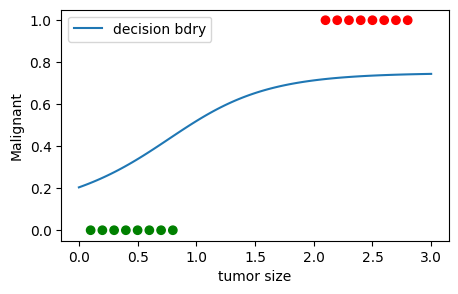


predictions: 
[1.  0.1]  0 ----> [0.23854948] --->[0]
[1.  0.2]  0 ----> [0.28796398] --->[0]
[1.  0.3]  0 ----> [0.3363943] --->[0]
[1.  0.4]  0 ----> [0.3807744] --->[0]
[1.  0.5]  0 ----> [0.4196418] --->[0]
[1.  0.6]  0 ----> [0.45281524] --->[0]
[1.  0.7]  0 ----> [0.48079646] --->[0]
[1.  0.8]  0 ----> [0.50431304] --->[1]
[1.  2.1]  1 ----> [0.6158732] --->[1]
[1.  2.2]  1 ----> [0.6179033] --->[1]
[1.  2.3]  1 ----> [0.61959554] --->[1]
[1.  2.4]  1 ----> [0.62100518] --->[1]
[1.  2.5]  1 ----> [0.62217873] --->[1]
[1.  2.6]  1 ----> [0.62315524] --->[1]
[1.  2.7]  1 ----> [0.62396744] --->[1]
[1.  2.8]  1 ----> [0.62464273] --->[1]


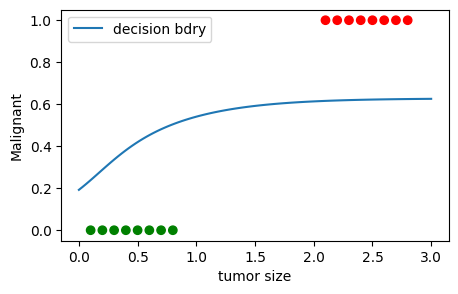


predictions: 
[1.  0.1]  0 ----> [0.47930981] --->[0]
[1.  0.2]  0 ----> [0.48108095] --->[0]
[1.  0.3]  0 ----> [0.48306599] --->[0]
[1.  0.4]  0 ----> [0.48528433] --->[0]
[1.  0.5]  0 ----> [0.48775611] --->[0]
[1.  0.6]  0 ----> [0.490502] --->[0]
[1.  0.7]  0 ----> [0.49354286] --->[0]
[1.  0.8]  0 ----> [0.49689936] --->[0]
[1.  2.1]  1 ----> [0.57428171] --->[1]
[1.  2.2]  1 ----> [0.5825191] --->[1]
[1.  2.3]  1 ----> [0.59090291] --->[1]
[1.  2.4]  1 ----> [0.59937183] --->[1]
[1.  2.5]  1 ----> [0.60786196] --->[1]
[1.  2.6]  1 ----> [0.61630872] --->[1]
[1.  2.7]  1 ----> [0.62464885] --->[1]
[1.  2.8]  1 ----> [0.63282234] --->[1]


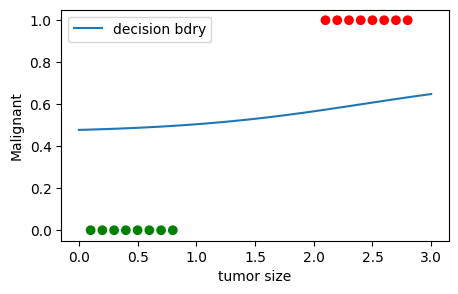


predictions: 
[1.  0.1]  0 ----> [0.21989384] --->[0]
[1.  0.2]  0 ----> [0.26559267] --->[0]
[1.  0.3]  0 ----> [0.31957939] --->[0]
[1.  0.4]  0 ----> [0.37729122] --->[0]
[1.  0.5]  0 ----> [0.43284265] --->[0]
[1.  0.6]  0 ----> [0.48141512] --->[0]
[1.  0.7]  0 ----> [0.52068944] --->[1]
[1.  0.8]  0 ----> [0.55065292] --->[1]
[1.  2.1]  1 ----> [0.62174075] --->[1]
[1.  2.2]  1 ----> [0.62179457] --->[1]
[1.  2.3]  1 ----> [0.62179892] --->[1]
[1.  2.4]  1 ----> [0.62177096] --->[1]
[1.  2.5]  1 ----> [0.62172234] --->[1]
[1.  2.6]  1 ----> [0.62166091] --->[1]
[1.  2.7]  1 ----> [0.62159197] --->[1]
[1.  2.8]  1 ----> [0.62151907] --->[1]


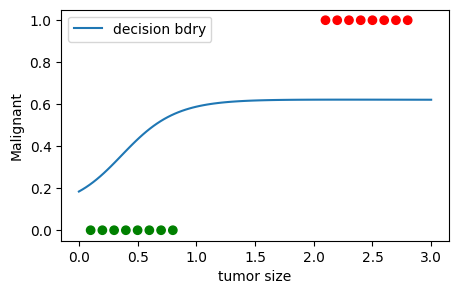


predictions: 
[1.  0.1]  0 ----> [0.37606007] --->[0]
[1.  0.2]  0 ----> [0.39269896] --->[0]
[1.  0.3]  0 ----> [0.40947655] --->[0]
[1.  0.4]  0 ----> [0.4260324] --->[0]
[1.  0.5]  0 ----> [0.44202671] --->[0]
[1.  0.6]  0 ----> [0.45716799] --->[0]
[1.  0.7]  0 ----> [0.47123207] --->[0]
[1.  0.8]  0 ----> [0.48407033] --->[0]
[1.  2.1]  1 ----> [0.55603848] --->[1]
[1.  2.2]  1 ----> [0.55739778] --->[1]
[1.  2.3]  1 ----> [0.55852269] --->[1]
[1.  2.4]  1 ----> [0.55945264] --->[1]
[1.  2.5]  1 ----> [0.56022079] --->[1]
[1.  2.6]  1 ----> [0.5608549] --->[1]
[1.  2.7]  1 ----> [0.56137812] --->[1]
[1.  2.8]  1 ----> [0.56180971] --->[1]


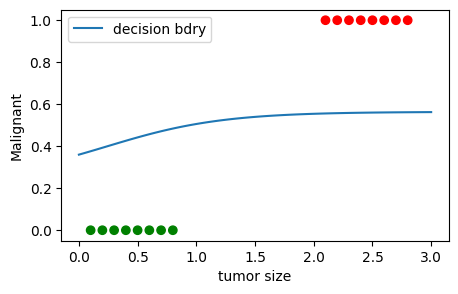


predictions: 
[1.  0.1]  0 ----> [0.15141046] --->[0]
[1.  0.2]  0 ----> [0.15699455] --->[0]
[1.  0.3]  0 ----> [0.16373521] --->[0]
[1.  0.4]  0 ----> [0.1718866] --->[0]
[1.  0.5]  0 ----> [0.18175862] --->[0]
[1.  0.6]  0 ----> [0.1937259] --->[0]
[1.  0.7]  0 ----> [0.20823478] --->[0]
[1.  0.8]  0 ----> [0.22580485] --->[0]
[1.  2.1]  1 ----> [0.78376929] --->[1]
[1.  2.2]  1 ----> [0.81983807] --->[1]
[1.  2.3]  1 ----> [0.85014516] --->[1]
[1.  2.4]  1 ----> [0.87517941] --->[1]
[1.  2.5]  1 ----> [0.89560831] --->[1]
[1.  2.6]  1 ----> [0.91214761] --->[1]
[1.  2.7]  1 ----> [0.92547857] --->[1]
[1.  2.8]  1 ----> [0.93620528] --->[1]


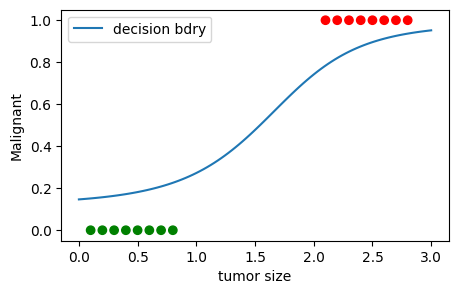


predictions: 
[1.  0.1]  0 ----> [0.45248271] --->[0]
[1.  0.2]  0 ----> [0.46474739] --->[0]
[1.  0.3]  0 ----> [0.47727541] --->[0]
[1.  0.4]  0 ----> [0.48972946] --->[0]
[1.  0.5]  0 ----> [0.50178035] --->[1]
[1.  0.6]  0 ----> [0.51314136] --->[1]
[1.  0.7]  0 ----> [0.52359335] --->[1]
[1.  0.8]  0 ----> [0.53299646] --->[1]
[1.  2.1]  1 ----> [0.57958856] --->[1]
[1.  2.2]  1 ----> [0.58024761] --->[1]
[1.  2.3]  1 ----> [0.58077671] --->[1]
[1.  2.4]  1 ----> [0.58120145] --->[1]
[1.  2.5]  1 ----> [0.58154253] --->[1]
[1.  2.6]  1 ----> [0.58181664] --->[1]
[1.  2.7]  1 ----> [0.58203722] --->[1]
[1.  2.8]  1 ----> [0.58221504] --->[1]


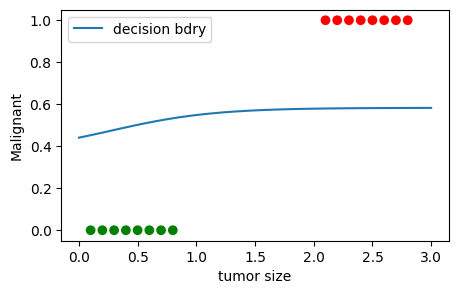


predictions: 
[1.  0.1]  0 ----> [0.23140686] --->[0]
[1.  0.2]  0 ----> [0.2683804] --->[0]
[1.  0.3]  0 ----> [0.30783909] --->[0]
[1.  0.4]  0 ----> [0.34829317] --->[0]
[1.  0.5]  0 ----> [0.38825799] --->[0]
[1.  0.6]  0 ----> [0.42648424] --->[0]
[1.  0.7]  0 ----> [0.46208087] --->[0]
[1.  0.8]  0 ----> [0.49452752] --->[0]
[1.  2.1]  1 ----> [0.68010888] --->[1]
[1.  2.2]  1 ----> [0.68409872] --->[1]
[1.  2.3]  1 ----> [0.68746868] --->[1]
[1.  2.4]  1 ----> [0.690313] --->[1]
[1.  2.5]  1 ----> [0.69271223] --->[1]
[1.  2.6]  1 ----> [0.69473505] --->[1]
[1.  2.7]  1 ----> [0.69643987] --->[1]
[1.  2.8]  1 ----> [0.69787624] --->[1]


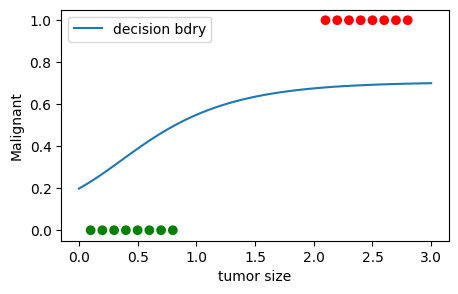


predictions: 
[1.  0.1]  0 ----> [0.39307622] --->[0]
[1.  0.2]  0 ----> [0.40456893] --->[0]
[1.  0.3]  0 ----> [0.41664847] --->[0]
[1.  0.4]  0 ----> [0.42926985] --->[0]
[1.  0.5]  0 ----> [0.44237555] --->[0]
[1.  0.6]  0 ----> [0.45589598] --->[0]
[1.  0.7]  0 ----> [0.46975057] --->[0]
[1.  0.8]  0 ----> [0.48384934] --->[0]
[1.  2.1]  1 ----> [0.64715337] --->[1]
[1.  2.2]  1 ----> [0.65591928] --->[1]
[1.  2.3]  1 ----> [0.66403643] --->[1]
[1.  2.4]  1 ----> [0.67152303] --->[1]
[1.  2.5]  1 ----> [0.67840305] --->[1]
[1.  2.6]  1 ----> [0.68470481] --->[1]
[1.  2.7]  1 ----> [0.69045968] --->[1]
[1.  2.8]  1 ----> [0.69570097] --->[1]


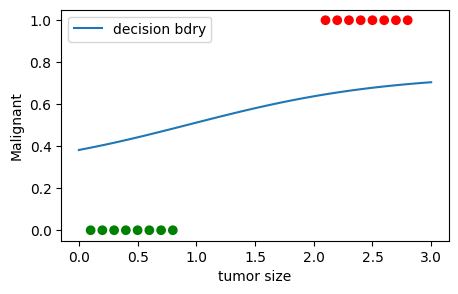


predictions: 
[1.  0.1]  0 ----> [0.49152115] --->[0]
[1.  0.2]  0 ----> [0.49608644] --->[0]
[1.  0.3]  0 ----> [0.49970538] --->[0]
[1.  0.4]  0 ----> [0.50255237] --->[1]
[1.  0.5]  0 ----> [0.50477873] --->[1]
[1.  0.6]  0 ----> [0.50651163] --->[1]
[1.  0.7]  0 ----> [0.50785555] --->[1]
[1.  0.8]  0 ----> [0.50889487] --->[1]
[1.  2.1]  1 ----> [0.51224987] --->[1]
[1.  2.2]  1 ----> [0.51227559] --->[1]
[1.  2.3]  1 ----> [0.5122953] --->[1]
[1.  2.4]  1 ----> [0.5123104] --->[1]
[1.  2.5]  1 ----> [0.51232198] --->[1]
[1.  2.6]  1 ----> [0.51233085] --->[1]
[1.  2.7]  1 ----> [0.51233764] --->[1]
[1.  2.8]  1 ----> [0.51234285] --->[1]


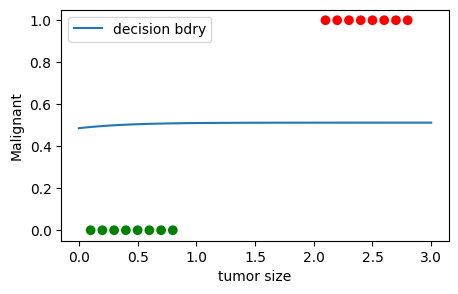

In [13]:
for j in range(10):
  colorss =['green']*8
  for i in range(8):
    colorss.append('red')

  model_mse = trainandplot(ThreeNeuronsNN, X, Y, False, colorss)

We can see sometimes, the fit quality is good and most of the times it is far-far from ideal.
Now let's see how CE loss performs

In [4]:
def ce_loss(y_pred, y_true):
  return  -(y_true*np.log(y_pred+1e-15) + (1-y_true)*np.log(1-y_pred+1e-15)) # positive

def ce_loss_derivative(y_pred, y_true):
  return  -(y_true/(y_pred+1e-15) + ((1-y_true)*(-1))/(1-y_pred+1e-15))


# concept - if we use ce_loss for classification then update rule comes out as theta = theta - lr*(y_hat-y)*x
## but since it is a multilayer NN, we need to do backprop i.e. calculae gradients. If we had single layer NN, then we could have used above written formula and it would be so simple.

class ThreeNeuronsNNCEloss:

  def __init__(self, weights1, bias1, weights2, bias2, weights3, bias3, print_loss=True):
    self.print_loss = print_loss
    self.weights1 = weights1
    self.weights2 = weights2
    self.weights3 = weights3
    self.bias1 = bias1
    self.bias2 = bias2
    self.bias3 = bias3
    self.n1 = Neuron(self.weights1, self.bias1)
    self.n2 = Neuron(self.weights2, self.bias2)
    self.n3 = Neuron(self.weights3, self.bias3)


  def ForwardAndBackward(self, X,Y, epochs=10, lr=0.001):
    for epoch in range(epochs):
      loss=0
      for x,y in zip(X,Y):

      # Run feedforward part
        self.z1 = self.n1.feedforward(x)
        self.z2 = self.n2.feedforward(x)
        inp_o = np.array([self.z1,self.z2]) # input to output neuron
        self.z3 = self.n3.feedforward(inp_o)

      # after feedforward, we calculate loss
        loss += ce_loss(self.z3, y)


      # TO update parameters - for ce_loss in classification - we can follow simple update rule of GLMs as stated above in the comments


        self.f_z1 = sigmoid(self.z1)
        self.f_z2 = sigmoid(self.z2)
        self.f_z3 = sigmoid(self.z3)

        self.del_Z1w1 =  self.f_z1 *(1-self.f_z1)*x[0]
        self.del_Z1w2 =  self.f_z1 *(1-self.f_z1)*x[1]
        self.del_Z1b1 =  self.f_z1 *(1-self.f_z1)


        self.del_Z2w3 =  self.f_z2 *(1-self.f_z2)*x[0]
        self.del_Z2w4 =  self.f_z2 *(1-self.f_z2)*x[1]
        self.del_Z2b2 =  self.f_z2 *(1-self.f_z2)

        self.del_Z3w5 =  self.f_z3 *(1-self.f_z3)*self.z1
        self.del_Z3w6 =  self.f_z3 *(1-self.f_z3)*self.z2
        self.del_Z3b3 =  self.f_z3 *(1-self.f_z3)

        self.del_Z3Z1 =  self.f_z3 *(1-self.f_z3)*self.weights3[0]
        self.del_Z3Z2 =  self.f_z3 *(1-self.f_z3)*self.weights3[1]

        self.del_LossZ3 = ce_loss_derivative(self.z3, y)

      # Now we add backpropagation part (Chain rule)

        del_L1w1 = self.del_LossZ3 * self.del_Z3Z1 * self.del_Z1w1
        del_L1w2 = self.del_LossZ3 * self.del_Z3Z1 * self.del_Z1w2
        del_L1b1 = self.del_LossZ3 * self.del_Z3Z1 * self.del_Z1b1

        del_L1w3 = self.del_LossZ3 * self.del_Z3Z2 * self.del_Z2w3
        del_L1w4 = self.del_LossZ3 * self.del_Z3Z2 * self.del_Z2w4
        del_L1b2 = self.del_LossZ3 * self.del_Z3Z2 * self.del_Z2b2

        del_L1w5 = self.del_LossZ3 * self.del_Z3w5
        del_L1w6 = self.del_LossZ3 * self.del_Z3w6
        del_L1b3 = self.del_LossZ3 * self.del_Z3b3


      # update parameters
        self.weights1[0] = self.weights1[0] - lr*(del_L1w1.item())
        self.weights1[1] = self.weights1[1] - lr*(del_L1w2.item())
        self.weights2[0] = self.weights2[0] - lr*(del_L1w3.item())
        self.weights2[1] = self.weights2[1] - lr*(del_L1w4.item())
        self.weights3[0] = self.weights3[0] - lr*(del_L1w5.item())
        self.weights3[1] = self.weights3[1] - lr*(del_L1w6.item())
        self.bias1[0] = self.bias1[0] - lr*(del_L1b1.item())
        self.bias2[0] = self.bias2[0] - lr*(del_L1b2.item())
        self.bias3[0] = self.bias3[0] - lr*(del_L1b3.item())

      # print loss after each epoch
      if self.print_loss:
        if epoch%10==0:
          print(f'Epoch: {epoch}: {x}, {y},  CE train loss: {loss}')


  def predict(self,x):
    z1 = self.n1.feedforward(x)
    z2 = self.n2.feedforward(x)
    inp_o = np.array([z1,z2]) # input to output neuron
    z3 = self.n3.feedforward(inp_o)

    return z3



In [71]:
# X data containng features bias term and size of tumour.
X = np.array([
  [1, 0.1],
  [1, 0.2],
  [1, 0.3],
  [1, 0.4],
  [1, 0.5],
  [1, 0.6],
  [1, 0.7],
  [1, 0.8],
  [1, 2.1],
  [1, 2.2],
  [1, 2.3],
  [1, 2.4],
  [1, 2.5],
  [1, 2.6],
  [1, 2.7],
  [1, 2.8],
  [1, 2.65] ## add an outlier
])
Y = np.array([
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0 ## add an outlier
])



weights1 = np.random.randn(2)
weights2 = np.random.randn(2)
weights3 = np.random.randn(2)
bias1 = np.random.randn(1)
bias2 = np.random.randn(1)
bias3 = np.random.randn(1)

# Train our neural network!
model2 = ThreeNeuronsNN(weights1, bias1, weights2, bias2, weights3, bias3)
model2.ForwardAndBackward(X,Y, lr=0.01, epochs=500)

# Let's check the performance on training set (Note: One should check it for both training and val/test)
print('\npredictions: ')
for x,y in zip(X,Y):
  pred = np.where(model2.predict(x)>=0.5, 1, 0)
  print(f'{x}  {y} ----> {model2.predict(x)} --->{pred}')

Epoch: 0: [1.   2.65], 0,  MSE train loss: 5.839261735091461
Epoch: 10: [1.   2.65], 0,  MSE train loss: 5.1949898904911045
Epoch: 20: [1.   2.65], 0,  MSE train loss: 4.703251203239053
Epoch: 30: [1.   2.65], 0,  MSE train loss: 4.3261616621121055
Epoch: 40: [1.   2.65], 0,  MSE train loss: 4.027778700782566
Epoch: 50: [1.   2.65], 0,  MSE train loss: 3.786299319775637
Epoch: 60: [1.   2.65], 0,  MSE train loss: 3.5890085740855504
Epoch: 70: [1.   2.65], 0,  MSE train loss: 3.4274577341338217
Epoch: 80: [1.   2.65], 0,  MSE train loss: 3.2951747746953832
Epoch: 90: [1.   2.65], 0,  MSE train loss: 3.186785405765637
Epoch: 100: [1.   2.65], 0,  MSE train loss: 3.0976963010063394
Epoch: 110: [1.   2.65], 0,  MSE train loss: 3.023973914721508
Epoch: 120: [1.   2.65], 0,  MSE train loss: 2.962284640494766
Epoch: 130: [1.   2.65], 0,  MSE train loss: 2.9098491510481095
Epoch: 140: [1.   2.65], 0,  MSE train loss: 2.864394769624421
Epoch: 150: [1.   2.65], 0,  MSE train loss: 2.824101761128

# Let's see how decision boundary gets shifted due to this outlier

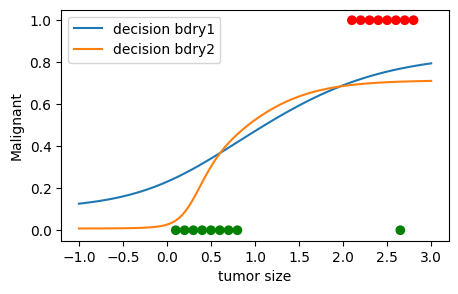

In [74]:
# plot Decision Boundary
xs = np.linspace(-1,3, 100)
x0s = np.ones_like(xs)
Xs = np.stack([x0s, xs], axis=1)
ys = []
ys2 = []
for x in Xs:
  pred1 = model.predict(x)
  ys.append(pred1)

  pred2 = model2.predict(x)
  ys2.append(pred2)


colors =['green']*8
for i in range(8):
    colors.append('red')
colors.append('green')

plt.figure(figsize = (5,3))
plt.scatter(X[:,1],Y, color = colors)
plt.plot(Xs[:,1], ys, label='decision bdry1')
plt.plot(Xs[:,1], ys2, label='decision bdry2')
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.legend()
plt.show()

In [76]:
# let's add more outliers

# X data containng features bias term and size of tumour.
X = np.array([
  [1, 0.1],
  [1, 0.2],
  [1, 0.3],
  [1, 0.4],
  [1, 0.5],
  [1, 0.6],
  [1, 0.7],
  [1, 0.8],
  [1, 2.1],
  [1, 2.2],
  [1, 2.3],
  [1, 2.4],
  [1, 2.5],
  [1, 2.6],
  [1, 2.7],
  [1, 2.8],
  [1, 2.65], ## add an outlier
  [1, 0.05] ## another outlier (hypt)
])
Y = np.array([
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0, ## add an outlier
  1 ## another outlier
])



weights1 = np.random.randn(2)
weights2 = np.random.randn(2)
weights3 = np.random.randn(2)
bias1 = np.random.randn(1)
bias2 = np.random.randn(1)
bias3 = np.random.randn(1)

# Train our neural network!
model3 = ThreeNeuronsNN(weights1, bias1, weights2, bias2, weights3, bias3)
model3.ForwardAndBackward(X,Y, lr=0.01, epochs=500)

# Let's check the performance on training set (Note: One should check it for both training and val/test)
print('\npredictions: ')
for x,y in zip(X,Y):
  pred = np.where(model3.predict(x)>=0.5, 1, 0)
  print(f'{x}  {y} ----> {model3.predict(x)} --->{pred}')


Epoch: 0: [1.   0.05], 1,  MSE train loss: 5.224393901150212
Epoch: 10: [1.   0.05], 1,  MSE train loss: 4.853382165721172
Epoch: 20: [1.   0.05], 1,  MSE train loss: 4.647761561606362
Epoch: 30: [1.   0.05], 1,  MSE train loss: 4.5350028518375955
Epoch: 40: [1.   0.05], 1,  MSE train loss: 4.467672032417165
Epoch: 50: [1.   0.05], 1,  MSE train loss: 4.420913139106244
Epoch: 60: [1.   0.05], 1,  MSE train loss: 4.382970195543876
Epoch: 70: [1.   0.05], 1,  MSE train loss: 4.348541690031124
Epoch: 80: [1.   0.05], 1,  MSE train loss: 4.315286139554819
Epoch: 90: [1.   0.05], 1,  MSE train loss: 4.282178702683804
Epoch: 100: [1.   0.05], 1,  MSE train loss: 4.2487757351389925
Epoch: 110: [1.   0.05], 1,  MSE train loss: 4.214892740581313
Epoch: 120: [1.   0.05], 1,  MSE train loss: 4.180464208672235
Epoch: 130: [1.   0.05], 1,  MSE train loss: 4.145482227460323
Epoch: 140: [1.   0.05], 1,  MSE train loss: 4.109969018086411
Epoch: 150: [1.   0.05], 1,  MSE train loss: 4.073964099369083
E

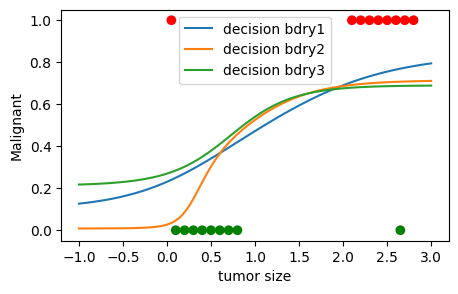

In [77]:
# plot Decision Boundary
xs = np.linspace(-1,3, 100)
x0s = np.ones_like(xs)
Xs = np.stack([x0s, xs], axis=1)
ys = []
ys2 = []
ys3 = []
for x in Xs:
  pred1 = model.predict(x)
  ys.append(pred1)

  pred2 = model2.predict(x)
  ys2.append(pred2)

  pred3 = model3.predict(x)
  ys3.append(pred3)


colors =['green']*8
for i in range(8):
    colors.append('red')
colors.append('green')
colors.append('red')

plt.figure(figsize = (5,3))
plt.scatter(X[:,1],Y, color = colors)
plt.plot(Xs[:,1], ys, label='decision bdry1')
plt.plot(Xs[:,1], ys2, label='decision bdry2')
plt.plot(Xs[:,1], ys3, label='decision bdry3')
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.legend()
plt.show()

Just observe how a single outliers vastly affects the decision boundary. Decision boundary infact tries to optimise for outlier intead of the whole dataset when we use MSE as loss. If we add a few more outliers, may be the decision boundary would just get flat - making all tumor size to be 50% probable as cancerous.

Epoch: 0: [1.   0.01], 1,  MSE train loss: 5.03812374454309
Epoch: 10: [1.   0.01], 1,  MSE train loss: 4.614756434516812
Epoch: 20: [1.   0.01], 1,  MSE train loss: 4.458090662224849
Epoch: 30: [1.   0.01], 1,  MSE train loss: 4.397161938895454
Epoch: 40: [1.   0.01], 1,  MSE train loss: 4.367902572437668
Epoch: 50: [1.   0.01], 1,  MSE train loss: 4.34865521217223
Epoch: 60: [1.   0.01], 1,  MSE train loss: 4.332400396013613
Epoch: 70: [1.   0.01], 1,  MSE train loss: 4.316983348277563
Epoch: 80: [1.   0.01], 1,  MSE train loss: 4.30182692174647
Epoch: 90: [1.   0.01], 1,  MSE train loss: 4.286841533265147
Epoch: 100: [1.   0.01], 1,  MSE train loss: 4.27207078307701
Epoch: 110: [1.   0.01], 1,  MSE train loss: 4.257581632937937
Epoch: 120: [1.   0.01], 1,  MSE train loss: 4.24343421627195
Epoch: 130: [1.   0.01], 1,  MSE train loss: 4.2296762703235755
Epoch: 140: [1.   0.01], 1,  MSE train loss: 4.216344260539291
Epoch: 150: [1.   0.01], 1,  MSE train loss: 4.203465670998197
Epoch: 

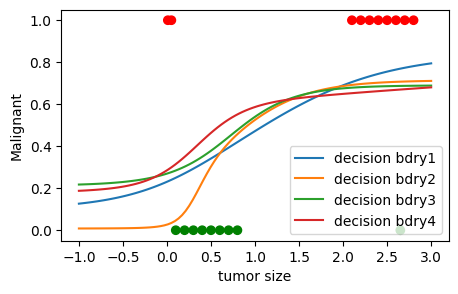

In [78]:
## Last iteration

# let's add more outliers

# X data containng features bias term and size of tumour.
X = np.array([
  [1, 0.1],
  [1, 0.2],
  [1, 0.3],
  [1, 0.4],
  [1, 0.5],
  [1, 0.6],
  [1, 0.7],
  [1, 0.8],
  [1, 2.1],
  [1, 2.2],
  [1, 2.3],
  [1, 2.4],
  [1, 2.5],
  [1, 2.6],
  [1, 2.7],
  [1, 2.8],
  [1, 2.65], ## add an outlier
  [1, 0.05], ## another outlier (hypt)
  [1, 0.01] ## another outlier (hypt)
])
Y = np.array([
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0, ## add an outlier
  1, ## another outlier
  1 ## another outlier
])



weights1 = np.random.randn(2)
weights2 = np.random.randn(2)
weights3 = np.random.randn(2)
bias1 = np.random.randn(1)
bias2 = np.random.randn(1)
bias3 = np.random.randn(1)

# Train our neural network!
model4 = ThreeNeuronsNN(weights1, bias1, weights2, bias2, weights3, bias3)
model4.ForwardAndBackward(X,Y, lr=0.01, epochs=500)

# Let's check the performance on training set (Note: One should check it for both training and val/test)
print('\npredictions: ')
for x,y in zip(X,Y):
  pred = np.where(model4.predict(x)>=0.5, 1, 0)
  print(f'{x}  {y} ----> {model4.predict(x)} --->{pred}')


# plot Decision Boundary
xs = np.linspace(-1,3, 100)
x0s = np.ones_like(xs)
Xs = np.stack([x0s, xs], axis=1)
ys = []
ys2 = []
ys3 = []
ys4 = []
for x in Xs:
  pred1 = model.predict(x)
  ys.append(pred1)

  pred2 = model2.predict(x)
  ys2.append(pred2)

  pred3 = model3.predict(x)
  ys3.append(pred3)

  pred4 = model4.predict(x)
  ys4.append(pred4)


colors =['green']*8
for i in range(8):
    colors.append('red')
colors.append('green')
colors.append('red')
colors.append('red')

plt.figure(figsize = (5,3))
plt.scatter(X[:,1],Y, color = colors)
plt.plot(Xs[:,1], ys, label='decision bdry1')
plt.plot(Xs[:,1], ys2, label='decision bdry2')
plt.plot(Xs[:,1], ys3, label='decision bdry3')
plt.plot(Xs[:,1], ys4, label='decision bdry4')
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.legend()
plt.show()


## See due to outliers, it increases the probability of low size cancerous cells to be more and large size cancerous to be lower.

####We used MSE for Classification. As we can see it only converged for 1 trial out of 5 trials. Hence, MSE for classification loss may or may not work. It is highly sensitive to initialization. Why? __Refer to answer 10-d in https://github.com/mgupta70/literature/blob/main/Logistic%20Regression.pdf for more details on it__

Epoch: 0: [1.  2.8], 1,  CE train loss: [8.8645242]
Epoch: 10: [1.  2.8], 1,  CE train loss: [8.49871648]
Epoch: 20: [1.  2.8], 1,  CE train loss: [8.20102887]
Epoch: 30: [1.  2.8], 1,  CE train loss: [7.94037429]
Epoch: 40: [1.  2.8], 1,  CE train loss: [7.70103269]
Epoch: 50: [1.  2.8], 1,  CE train loss: [7.4749091]
Epoch: 60: [1.  2.8], 1,  CE train loss: [7.25781536]
Epoch: 70: [1.  2.8], 1,  CE train loss: [7.04760311]
Epoch: 80: [1.  2.8], 1,  CE train loss: [6.84319779]
Epoch: 90: [1.  2.8], 1,  CE train loss: [6.64408822]
Epoch: 100: [1.  2.8], 1,  CE train loss: [6.45005297]
Epoch: 110: [1.  2.8], 1,  CE train loss: [6.26101271]
Epoch: 120: [1.  2.8], 1,  CE train loss: [6.07695051]
Epoch: 130: [1.  2.8], 1,  CE train loss: [5.89786941]
Epoch: 140: [1.  2.8], 1,  CE train loss: [5.72377053]
Epoch: 150: [1.  2.8], 1,  CE train loss: [5.55464262]
Epoch: 160: [1.  2.8], 1,  CE train loss: [5.39045791]
Epoch: 170: [1.  2.8], 1,  CE train loss: [5.23117133]
Epoch: 180: [1.  2.8], 

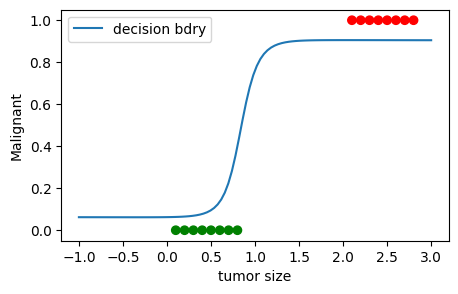

In [10]:
# X data containng features bias term and size of tumour.
X = np.array([
  [1, 0.1],
  [1, 0.2],
  [1, 0.3],
  [1, 0.4],
  [1, 0.5],
  [1, 0.6],
  [1, 0.7],
  [1, 0.8],
  [1, 2.1],
  [1, 2.2],
  [1, 2.3],
  [1, 2.4],
  [1, 2.5],
  [1, 2.6],
  [1, 2.7],
  [1, 2.8],
])
Y = np.array([
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
])



weights1 = np.random.randn(2)
weights2 = np.random.randn(2)
weights3 = np.random.randn(2)
bias1 = np.random.randn(1)
bias2 = np.random.randn(1)
bias3 = np.random.randn(1)

# Train our neural network!
model = ThreeNeuronsNNCEloss(weights1, bias1, weights2, bias2, weights3, bias3)
model.ForwardAndBackward(X,Y, lr=0.005, epochs=500)

# Let's check the performance on training set (Note: One should check it for both training and val/test)
print('\npredictions: ')
for x,y in zip(X,Y):
  pred = np.where(model.predict(x)>=0.5, 1, 0)
  print(f'{x}  {y} ----> {model.predict(x)} --->{pred}')


# plot Decision Boundary
xs = np.linspace(-1,3, 100)
x0s = np.ones_like(xs)
Xs = np.stack([x0s, xs], axis=1)
ys = []
for x in Xs:
  pred = model.predict(x)
  ys.append(pred)


colors =['green']*8
for i in range(8):
    colors.append('red')

plt.figure(figsize = (5,3))
plt.scatter(X[:,1],Y, color = colors)
plt.plot(Xs[:,1], ys, label='decision bdry')
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.legend()
plt.show()

Epoch: 0: [1.   2.65], 0,  CE train loss: [19.37521568]
Epoch: 10: [1.   2.65], 0,  CE train loss: [13.60434726]
Epoch: 20: [1.   2.65], 0,  CE train loss: [11.48654354]
Epoch: 30: [1.   2.65], 0,  CE train loss: [10.53671476]
Epoch: 40: [1.   2.65], 0,  CE train loss: [10.05072168]
Epoch: 50: [1.   2.65], 0,  CE train loss: [9.76775758]
Epoch: 60: [1.   2.65], 0,  CE train loss: [9.58166591]
Epoch: 70: [1.   2.65], 0,  CE train loss: [9.4461704]
Epoch: 80: [1.   2.65], 0,  CE train loss: [9.33996325]
Epoch: 90: [1.   2.65], 0,  CE train loss: [9.25272179]
Epoch: 100: [1.   2.65], 0,  CE train loss: [9.17915456]
Epoch: 110: [1.   2.65], 0,  CE train loss: [9.11635142]
Epoch: 120: [1.   2.65], 0,  CE train loss: [9.06256471]
Epoch: 130: [1.   2.65], 0,  CE train loss: [9.01663404]
Epoch: 140: [1.   2.65], 0,  CE train loss: [8.97770904]
Epoch: 150: [1.   2.65], 0,  CE train loss: [8.94511289]
Epoch: 160: [1.   2.65], 0,  CE train loss: [8.91827394]
Epoch: 170: [1.   2.65], 0,  CE train 

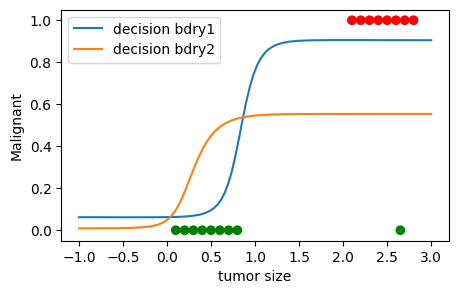

In [11]:
# X data containng features bias term and size of tumour.
X = np.array([
  [1, 0.1],
  [1, 0.2],
  [1, 0.3],
  [1, 0.4],
  [1, 0.5],
  [1, 0.6],
  [1, 0.7],
  [1, 0.8],
  [1, 2.1],
  [1, 2.2],
  [1, 2.3],
  [1, 2.4],
  [1, 2.5],
  [1, 2.6],
  [1, 2.7],
  [1, 2.8],
  [1, 2.65] ## add an outlier
])
Y = np.array([
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0 ## add an outlier
])



weights1 = np.random.randn(2)
weights2 = np.random.randn(2)
weights3 = np.random.randn(2)
bias1 = np.random.randn(1)
bias2 = np.random.randn(1)
bias3 = np.random.randn(1)

# Train our neural network!
model2 = ThreeNeuronsNNCEloss(weights1, bias1, weights2, bias2, weights3, bias3)
model2.ForwardAndBackward(X,Y, lr=0.005, epochs=500)

# Let's check the performance on training set (Note: One should check it for both training and val/test)
print('\npredictions: ')
for x,y in zip(X,Y):
  pred = np.where(model2.predict(x)>=0.5, 1, 0)
  print(f'{x}  {y} ----> {model2.predict(x)} --->{pred}')

# plot Decision Boundary
xs = np.linspace(-1,3, 100)
x0s = np.ones_like(xs)
Xs = np.stack([x0s, xs], axis=1)
ys = []
ys2 = []
for x in Xs:
  pred1 = model.predict(x)
  ys.append(pred1)

  pred2 = model2.predict(x)
  ys2.append(pred2)


colors =['green']*8
for i in range(8):
    colors.append('red')
colors.append('green')

plt.figure(figsize = (5,3))
plt.scatter(X[:,1],Y, color = colors)
plt.plot(Xs[:,1], ys, label='decision bdry1')
plt.plot(Xs[:,1], ys2, label='decision bdry2')
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.legend()
plt.show()